In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the colorblind-friendly palette in seaborn
sns.set_palette('colorblind')

# Get the color palette from seaborn
palette = sns.color_palette()

# Set the color palette as the default in matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)

In [3]:
from mecvae.lit import BrainMeasuresDataModule, LitCVAE

# Instantiate the LitCVAE model and BrainMeasuresDataModule
n_features = 50
n_batches = 4
n_samples = 10000
batch_size = 32

data_module = BrainMeasuresDataModule(n_samples, n_features, n_batches, batch_size=batch_size)
data_module.prepare_data()
data_module.setup()

In [5]:
data_module.X

tensor([[ 0.6676,  1.3222,  1.0479,  ..., -0.5352,  0.0000,  1.0000],
        [ 0.7890, -1.9556, -0.0903,  ..., -1.1606,  0.0000,  1.0000],
        [ 0.2874, -0.4093,  0.3186,  ...,  0.3788,  0.0000,  1.0000],
        ...,
        [-0.6946,  1.1273, -0.1158,  ...,  0.7089,  1.0000,  0.0000],
        [ 1.1805,  0.6752, -0.3172,  ...,  1.1593,  0.0000,  1.0000],
        [ 0.8926,  1.7899,  0.3835,  ...,  0.1323,  1.0000,  0.0000]])

In [4]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

# After one_hot encoding
lit_cvae = LitCVAE(num_dim=data_module.num_dim, cat_dim=data_module.cat_dim, n_batches=n_batches)

# Define callbacks
early_stop_callback = EarlyStopping(monitor='Validation/Loss', patience=30, verbose=True)
checkpoint_callback = ModelCheckpoint(monitor='Validation/Loss', dirpath='checkpoints/', filename='best_model')

# Train the LitCVAE model using PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=100, callbacks=[early_stop_callback, checkpoint_callback])
trainer.fit(lit_cvae, data_module)

# Load the best model
best_model_path = checkpoint_callback.best_model_path
best_lit_cvae = LitCVAE.load_from_checkpoint(best_model_path)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/ssilvari/Library/Caches/pypoetry/virtualenvs/mecvae-_b3Dgs6W-py3.11/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /Users/ssilvari/PycharmProjects/Fed-MECVAE/notebooks/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name | Type | Params
------------------------------
0 | cvae | CVAE | 27.5 K
------------------------------
27.5 K    Trainable params
0         Non-trainable params
27.5 K    Total params
0.110     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/ssilvari/Library/Caches/pypoetry/virtualenvs/mecvae-_b3Dgs6W-py3.11/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/Users/ssilvari/Library/Caches/pypoetry/virtualenvs/mecvae-_b3Dgs6W-py3.11/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0: 100%|██████████| 63/63 [00:01<00:00, 35.44it/s, v_num=36, Train/Loss=795.0, Validation/Loss=1.57e+3]

Metric Validation/Loss improved. New best score: 1573.909


Epoch 1: 100%|██████████| 63/63 [00:01<00:00, 62.91it/s, v_num=36, Train/Loss=783.0, Validation/Loss=1.53e+3]   

Metric Validation/Loss improved by 44.064 >= min_delta = 0.0. New best score: 1529.845


Epoch 2: 100%|██████████| 63/63 [00:01<00:00, 62.75it/s, v_num=36, Train/Loss=755.0, Validation/Loss=1.5e+3]    

Metric Validation/Loss improved by 31.795 >= min_delta = 0.0. New best score: 1498.050


Epoch 3: 100%|██████████| 63/63 [00:00<00:00, 64.20it/s, v_num=36, Train/Loss=738.0, Validation/Loss=1.49e+3]  

Metric Validation/Loss improved by 4.326 >= min_delta = 0.0. New best score: 1493.724


Epoch 4: 100%|██████████| 63/63 [00:00<00:00, 63.45it/s, v_num=36, Train/Loss=764.0, Validation/Loss=1.48e+3]   

Metric Validation/Loss improved by 11.170 >= min_delta = 0.0. New best score: 1482.554


Epoch 5: 100%|██████████| 63/63 [00:01<00:00, 62.71it/s, v_num=36, Train/Loss=737.0, Validation/Loss=1.47e+3]   

Metric Validation/Loss improved by 8.819 >= min_delta = 0.0. New best score: 1473.735


Epoch 7: 100%|██████████| 63/63 [00:00<00:00, 64.57it/s, v_num=36, Train/Loss=718.0, Validation/Loss=1.47e+3]   

Metric Validation/Loss improved by 5.996 >= min_delta = 0.0. New best score: 1467.739


Epoch 8: 100%|██████████| 63/63 [00:01<00:00, 62.76it/s, v_num=36, Train/Loss=740.0, Validation/Loss=1.46e+3]   

Metric Validation/Loss improved by 4.779 >= min_delta = 0.0. New best score: 1462.960


Epoch 9: 100%|██████████| 63/63 [00:01<00:00, 60.03it/s, v_num=36, Train/Loss=708.0, Validation/Loss=1.46e+3]   

Metric Validation/Loss improved by 6.608 >= min_delta = 0.0. New best score: 1456.352


Epoch 13: 100%|██████████| 63/63 [00:00<00:00, 63.36it/s, v_num=36, Train/Loss=734.0, Validation/Loss=1.44e+3]   

Metric Validation/Loss improved by 20.631 >= min_delta = 0.0. New best score: 1435.722


Epoch 14: 100%|██████████| 63/63 [00:01<00:00, 58.67it/s, v_num=36, Train/Loss=699.0, Validation/Loss=1.43e+3]   

Metric Validation/Loss improved by 3.130 >= min_delta = 0.0. New best score: 1432.592


Epoch 16: 100%|██████████| 63/63 [00:00<00:00, 63.08it/s, v_num=36, Train/Loss=685.0, Validation/Loss=1.43e+3]   

Metric Validation/Loss improved by 5.075 >= min_delta = 0.0. New best score: 1427.517


Epoch 18: 100%|██████████| 63/63 [00:00<00:00, 63.34it/s, v_num=36, Train/Loss=670.0, Validation/Loss=1.43e+3]   

Metric Validation/Loss improved by 2.389 >= min_delta = 0.0. New best score: 1425.128


Epoch 21: 100%|██████████| 63/63 [00:01<00:00, 61.38it/s, v_num=36, Train/Loss=641.0, Validation/Loss=1.42e+3]   

Metric Validation/Loss improved by 0.390 >= min_delta = 0.0. New best score: 1424.737


Epoch 22: 100%|██████████| 63/63 [00:00<00:00, 65.39it/s, v_num=36, Train/Loss=702.0, Validation/Loss=1.42e+3]   

Metric Validation/Loss improved by 1.310 >= min_delta = 0.0. New best score: 1423.427


Epoch 27: 100%|██████████| 63/63 [00:00<00:00, 65.07it/s, v_num=36, Train/Loss=656.0, Validation/Loss=1.42e+3]   

Metric Validation/Loss improved by 1.355 >= min_delta = 0.0. New best score: 1422.073


Epoch 30: 100%|██████████| 63/63 [00:00<00:00, 66.96it/s, v_num=36, Train/Loss=667.0, Validation/Loss=1.42e+3]   

Metric Validation/Loss improved by 1.066 >= min_delta = 0.0. New best score: 1421.007


Epoch 46: 100%|██████████| 63/63 [00:00<00:00, 66.59it/s, v_num=36, Train/Loss=691.0, Validation/Loss=1.42e+3]   

Metric Validation/Loss improved by 1.710 >= min_delta = 0.0. New best score: 1419.297


Epoch 55: 100%|██████████| 63/63 [00:01<00:00, 59.43it/s, v_num=36, Train/Loss=693.0, Validation/Loss=1.42e+3]   

Metric Validation/Loss improved by 0.302 >= min_delta = 0.0. New best score: 1418.994


Epoch 85: 100%|██████████| 63/63 [00:01<00:00, 62.83it/s, v_num=36, Train/Loss=683.0, Validation/Loss=1.42e+3]   

Monitored metric Validation/Loss did not improve in the last 30 records. Best score: 1418.994. Signaling Trainer to stop.


Epoch 85: 100%|██████████| 63/63 [00:01<00:00, 62.66it/s, v_num=36, Train/Loss=683.0, Validation/Loss=1.42e+3]


In [107]:
import torch
import pandas as pd

def predict(n_samples=10):
    pred_samples = []
    for i in range(n_samples):
        y_harm_data = torch.cat(trainer.predict(lit_cvae, datamodule=data_module), dim=0)
        pred_samples.append(y_harm_data)
    return torch.stack(pred_samples).mean(axis=0)


num_cols = data_module.df.columns[:n_features]
mu, std = data_module.df[num_cols].mean(), data_module.df[num_cols].std()

cols_to_attach = data_module.df.columns[n_features:]
# y_harm_data = predict()
y_harm_data = torch.cat(trainer.predict(lit_cvae, datamodule=data_module), dim=0)
df_harm = pd.DataFrame(y_harm_data[:, :n_features], columns=num_cols) * std + mu

df_harm = df_harm.join(data_module.df[cols_to_attach])
print(df_harm.shape)
df_harm.head()

/Users/ssilvari/Library/Caches/pypoetry/virtualenvs/mecvae-_b3Dgs6W-py3.11/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 313/313 [00:18<00:00, 16.55it/s]
(10000, 54)


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Sex,Age,Scanner,Batch
0,1.241781,-0.132252,0.702960,0.227861,0.207964,0.636728,0.082935,0.900882,0.204678,0.760108,...,0.559110,1.031400,0.840620,1.013670,0.401918,0.912795,1.0,43.726924,-0.026179,0.0
1,1.402075,-0.308434,0.716695,0.298209,0.361367,0.702886,0.003253,1.147955,0.041695,0.731714,...,0.350866,0.947244,0.712138,1.137350,0.409126,0.925783,1.0,48.916006,-0.057004,3.0
2,1.041062,-0.086225,0.628739,0.285223,0.333927,0.788565,0.167320,0.836857,0.219060,0.788368,...,0.545178,0.841587,0.691409,1.013540,0.489170,0.826211,1.0,26.762962,0.018871,0.0
3,1.001127,-0.130582,0.489653,0.182175,0.343277,0.742045,0.127083,0.858632,0.233245,0.608560,...,0.294689,0.654337,0.866291,1.027233,0.487787,0.912953,0.0,38.966638,-0.006027,1.0
4,0.643872,0.273326,0.483130,0.275074,0.748773,0.738950,0.102357,0.529842,0.100736,0.772873,...,0.777748,0.801173,0.485165,0.714499,0.634081,0.774356,1.0,15.735314,0.003412,1.0


In [108]:
data_module.df_unbiased.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Sex,Age,Scanner,Batch
0,1.468360,0.368695,0.870750,1.028512,0.116765,0.214467,-0.228488,0.805246,0.322222,0.282265,...,0.631182,1.266803,0.604956,1.326045,-0.109159,0.758676,1.0,43.726924,-0.026179,0.0
1,1.693591,-0.616072,0.548637,1.110268,0.337134,0.219671,-0.311153,1.355918,0.315270,0.987113,...,0.412007,0.939444,0.299272,1.201613,-0.179455,0.619226,1.0,48.916006,-0.057004,3.0
2,1.229552,-0.257832,0.565303,0.438513,0.142399,0.752167,0.220732,1.073227,0.519236,0.853848,...,0.394053,0.983118,0.285673,0.808737,0.112029,0.548617,1.0,26.762962,0.018871,0.0
3,0.799612,0.280198,0.301368,0.398628,0.773378,0.902307,0.126283,0.631508,0.595005,0.743154,...,-0.167357,0.495874,1.148955,1.196975,0.181685,0.604115,0.0,38.966638,-0.006027,1.0
4,0.610209,0.777037,0.514407,0.075651,0.810497,0.256835,-0.077312,0.382071,0.076574,0.724054,...,0.668101,0.242347,0.119876,0.284659,0.825420,0.226219,1.0,15.735314,0.003412,1.0


In [109]:
data_module.df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Sex,Age,Scanner,Batch
0,1.336488,0.304018,0.846122,0.895244,0.119269,0.233137,-0.218732,0.803447,0.297253,0.299507,...,0.701357,1.142709,0.614978,1.286436,-0.079536,0.854951,1.0,43.726924,-0.026179,0.0
1,1.380241,-0.792371,0.503108,0.404131,0.242183,0.452741,-0.389957,1.209935,0.179199,1.050535,...,0.803954,0.983086,0.366955,1.422762,0.137279,0.928658,1.0,48.916006,-0.057004,3.0
2,1.199402,-0.275165,0.626324,0.497389,0.181617,0.752172,0.149768,1.042131,0.593311,0.964417,...,0.405589,0.834308,0.280431,0.778015,0.154263,0.533762,1.0,26.762962,0.018871,0.0
3,0.698231,0.058023,0.257151,0.210971,0.813316,0.824833,0.060675,0.542976,0.578137,0.676028,...,-0.063206,0.547559,1.112930,1.138747,0.264548,0.707948,0.0,38.966638,-0.006027,1.0
4,0.527811,0.647056,0.465621,-0.146221,0.866791,0.347837,-0.096966,0.280138,0.034029,0.715723,...,0.719475,0.241090,0.139292,0.349112,0.988322,0.318532,1.0,15.735314,0.003412,1.0


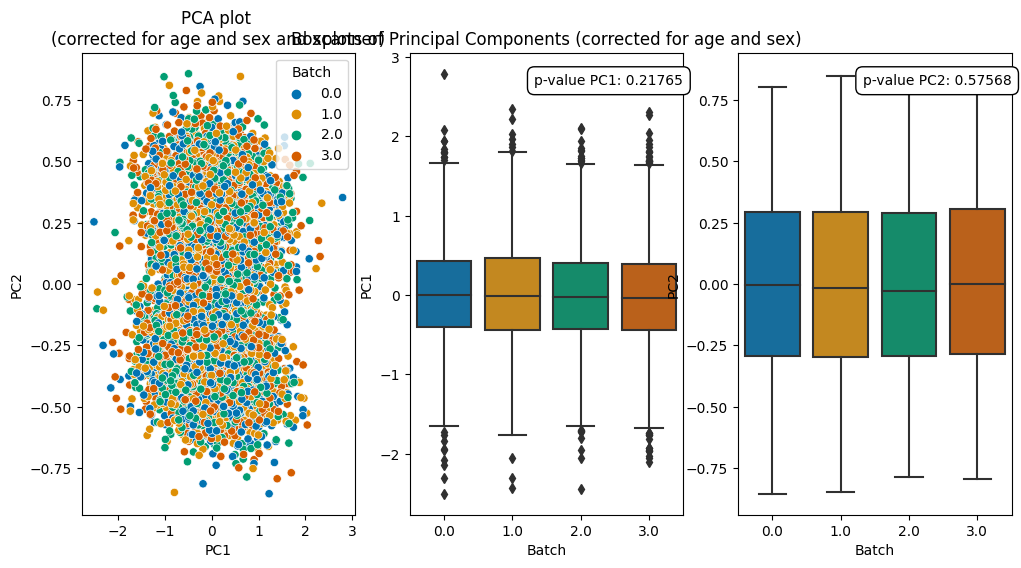

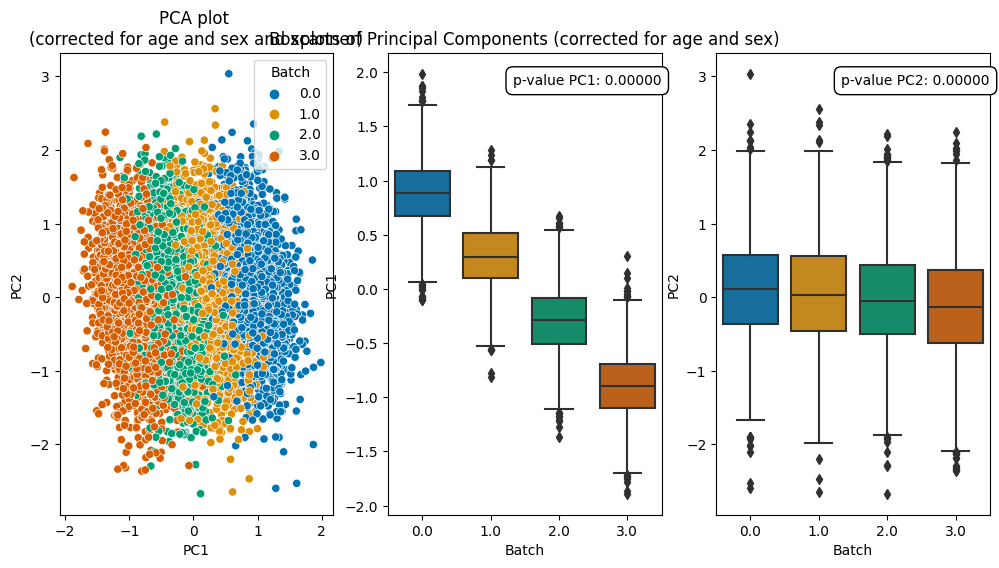

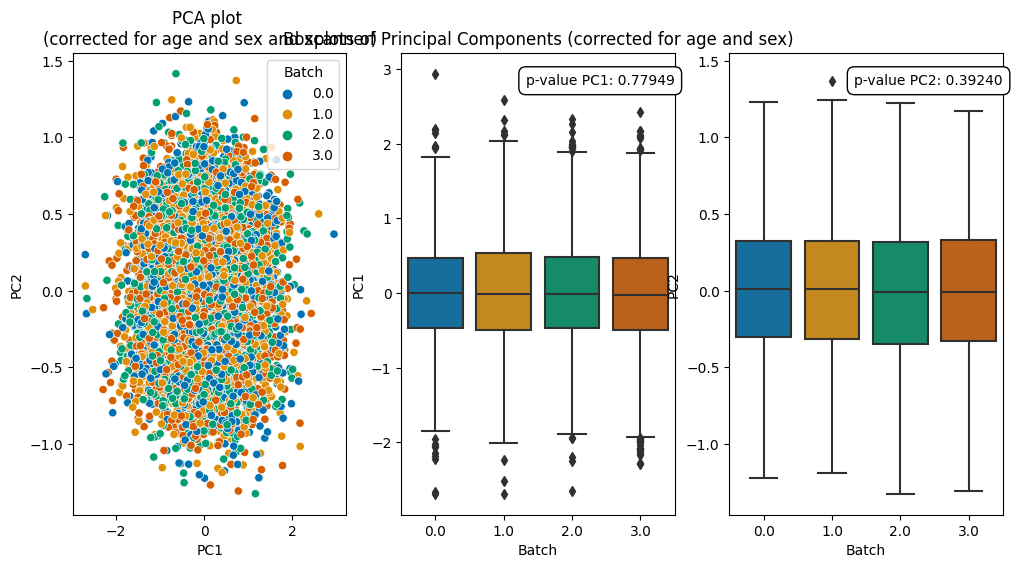

In [110]:
from mecvae.data import plot_batch_effects

plot_batch_effects(df_harm)
plot_batch_effects(data_module.df)
plot_batch_effects(data_module.df_unbiased)

print()

/Users/ssilvari/Library/Caches/pypoetry/virtualenvs/mecvae-_b3Dgs6W-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/ssilvari/Library/Caches/pypoetry/virtualenvs/mecvae-_b3Dgs6W-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


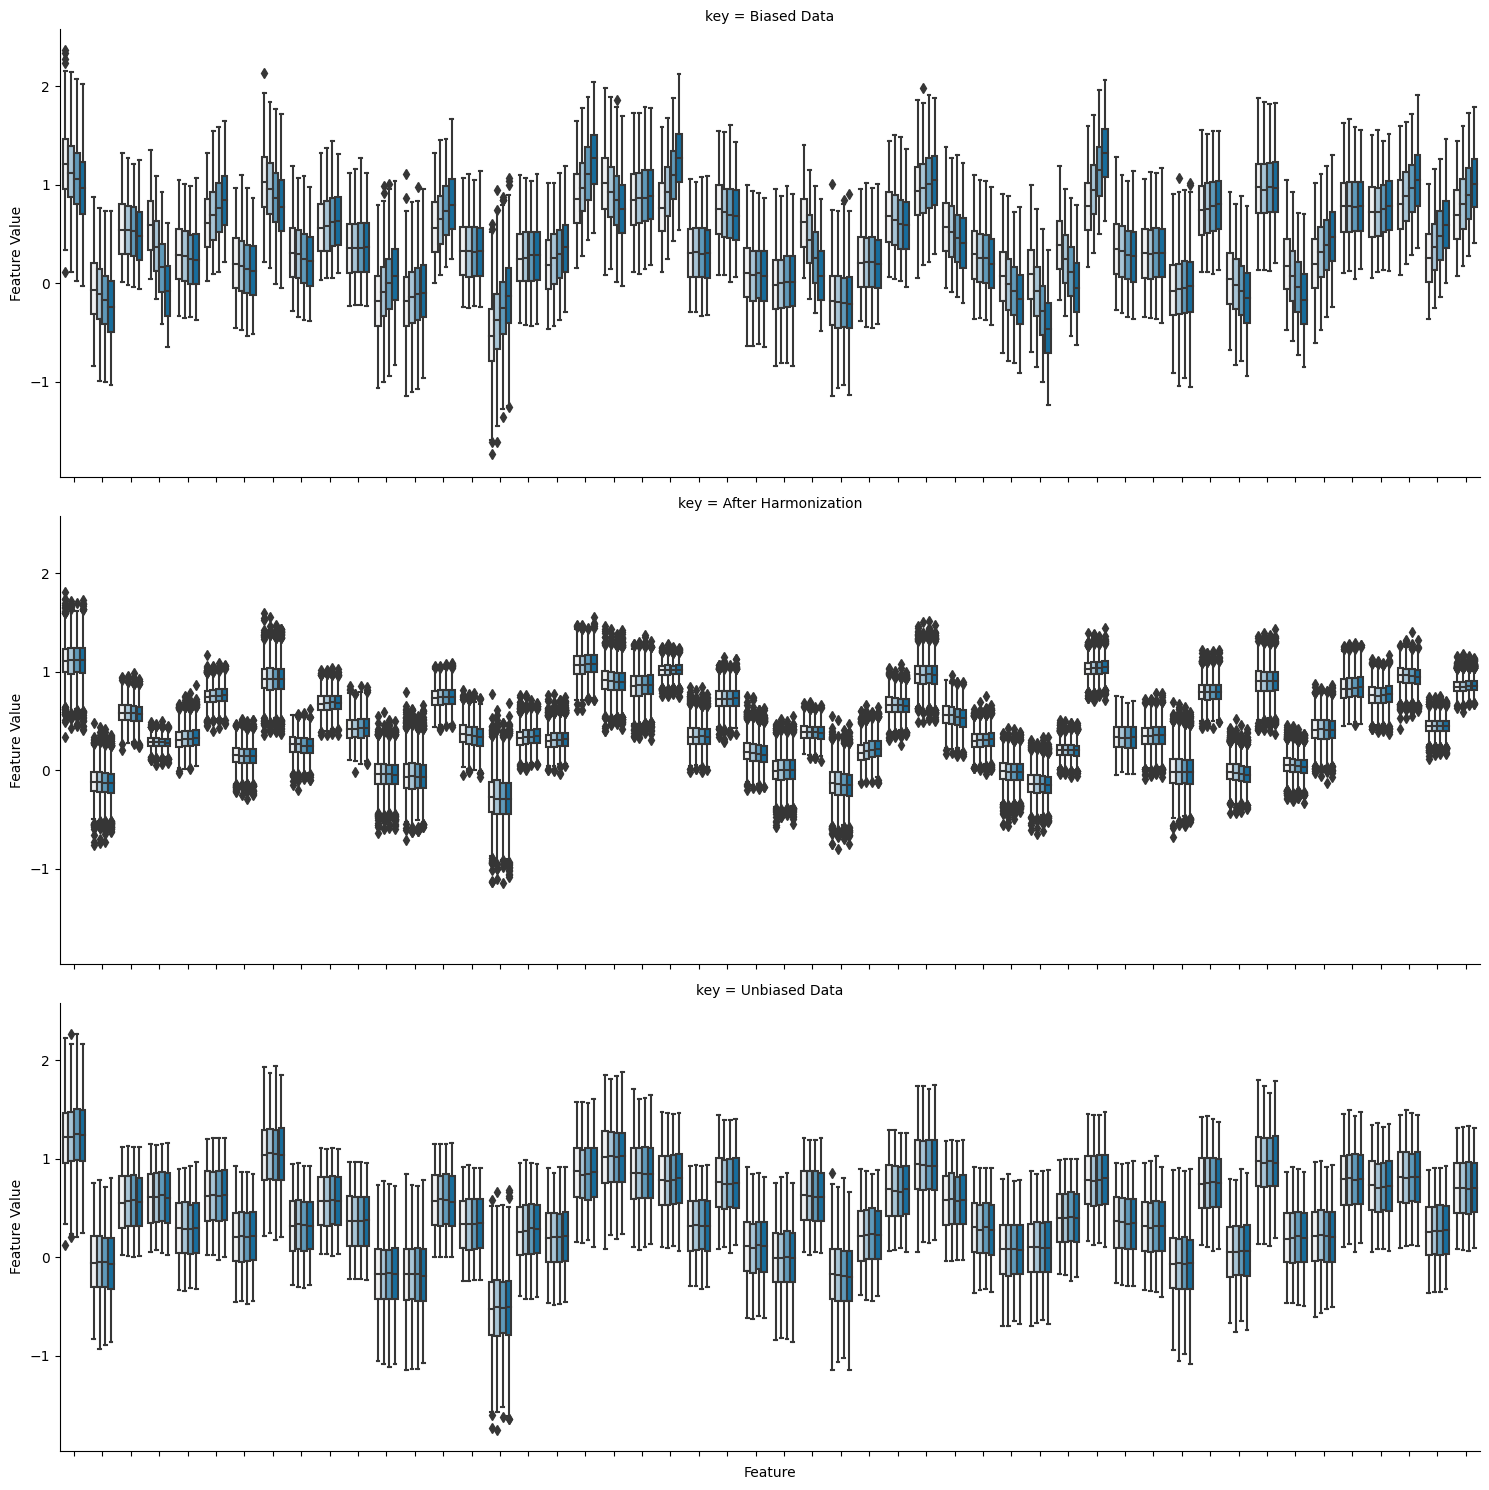

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_distribution(data_dict):
    # Concatenate the dataframes in the dictionary, preserving the keys as an additional column
    melted_df = pd.concat([df.melt(id_vars={'Batch'}, value_vars=[col for col in df.columns if col.startswith('Feature')], var_name='Feature', value_name='value').assign(key=key) for key, df in data_dict.items()])

    # Create a FacetGrid with shared y-axis and adjusted width for A4 page
    g = sns.FacetGrid(data=melted_df, col='key', col_wrap=1, sharey=True, height=5, aspect=3)

    # Plot the feature distribution across batches using a boxplot for each subplot
    g.map(sns.boxplot, 'Feature', 'value', 'Batch')

    # Rotate x-axis labels
    g.set_xticklabels(rotation=90)

    # Set the x-axis and y-axis labels for the entire plot
    g.set_axis_labels('Feature', 'Feature Value')

    # Adjust the plot layout
    g.tight_layout()

    # Show the plot
    plt.show()


data_dict = {
    'Biased Data': data_module.df,
    'After Harmonization': df_harm,
    'Unbiased Data': data_module.df_unbiased
}

plot_feature_distribution(data_dict)


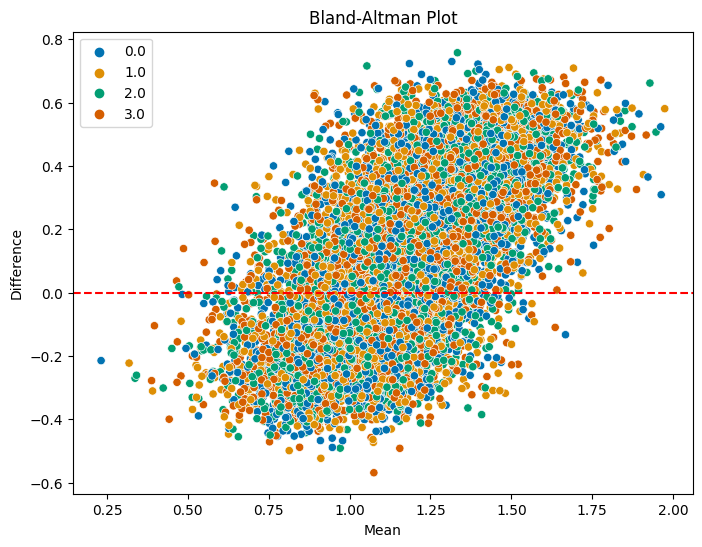

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_bland_altman_plot(df, df_harm, batch_col, feature_name):
    # Merge the dataframes based on their index
    merged_df = pd.merge(df, df_harm, left_index=True, right_index=True, suffixes=('_x', '_y'))
    
    # Calculate the mean and difference between the two datasets
    merged_df['Mean'] = (merged_df[feature_name + '_x'] + merged_df[feature_name + '_y']) / 2
    merged_df['Difference'] = merged_df[feature_name + '_x'] - merged_df[feature_name + '_y']

    batch_col = batch_col + '_x'
    merged_df[batch_col] = merged_df[batch_col].astype('category')
    
    # Create the Bland-Altman plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Mean', y='Difference', hue=batch_col, data=merged_df, palette='colorblind')
    plt.axhline(0, color='red', linestyle='--')  # Add the mean difference line
    plt.title('Bland-Altman Plot')
    plt.xlabel('Mean')
    plt.ylabel('Difference')
    plt.legend()
    plt.show()

# Example usage
create_bland_altman_plot(data_module.df_unbiased, df_harm, batch_col='Batch', feature_name='Feature_1')


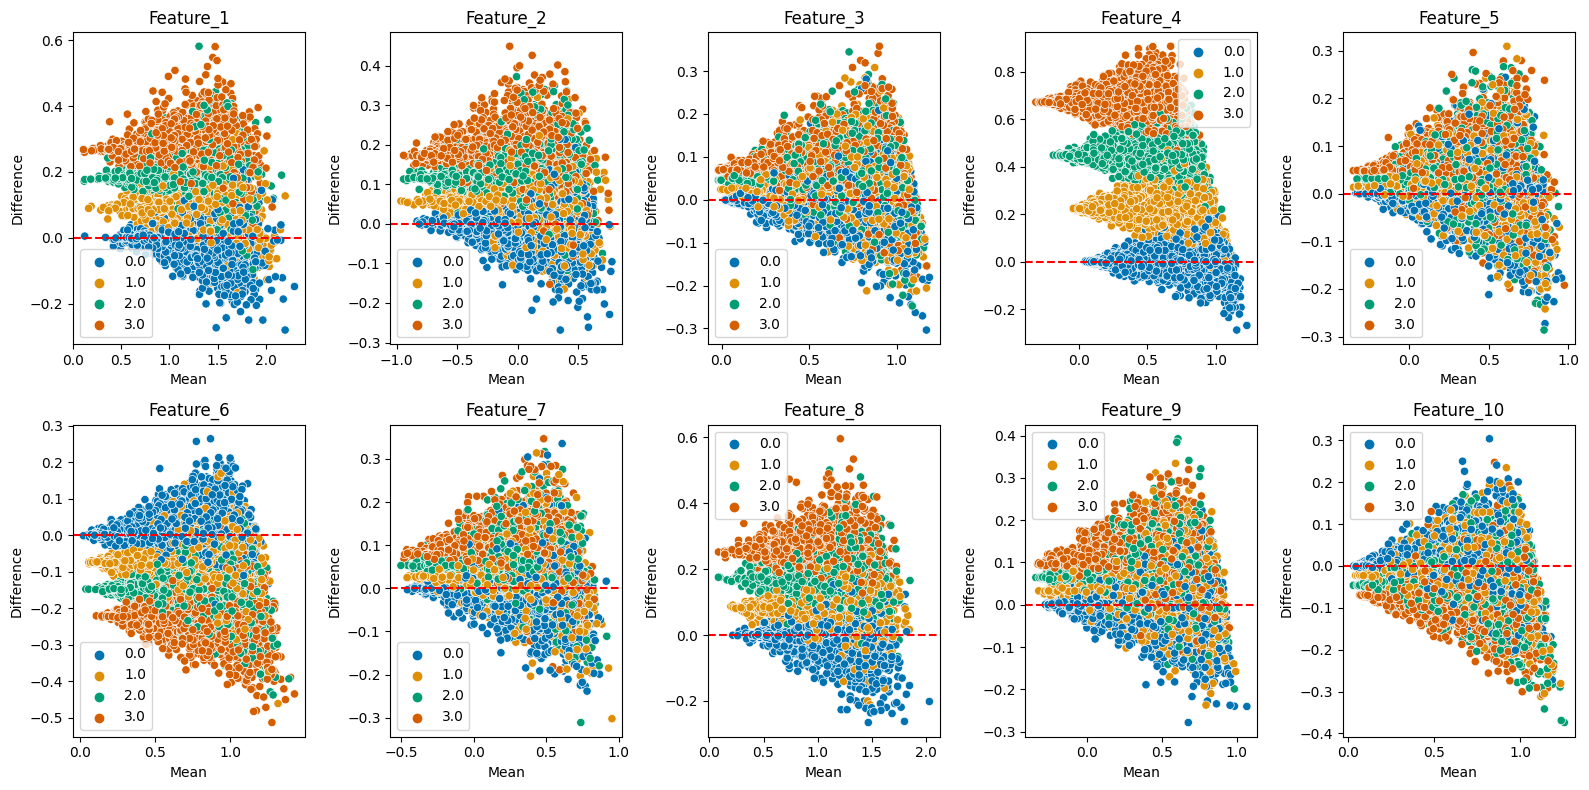

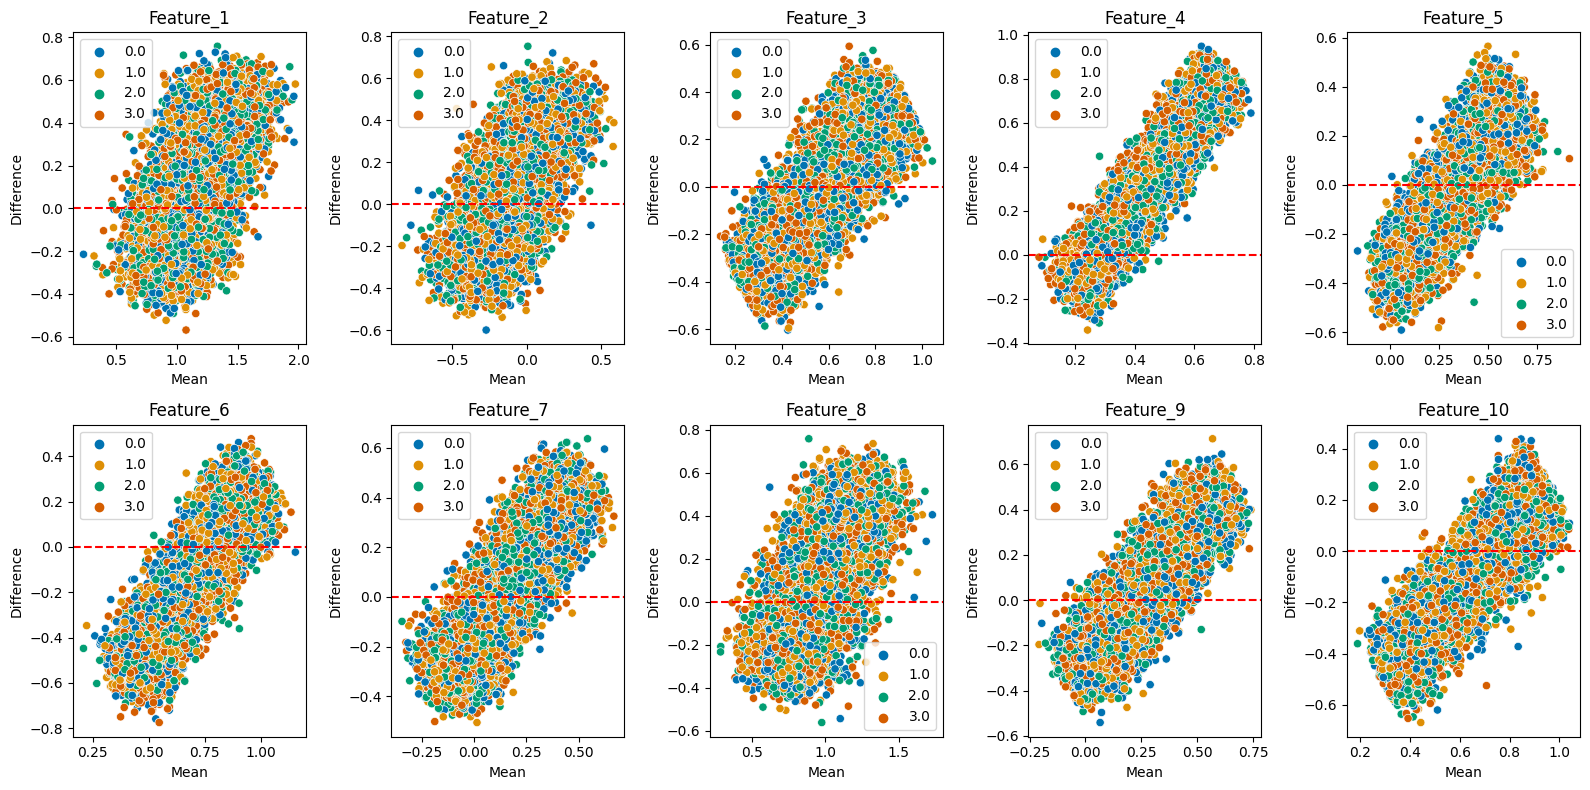

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_bland_altman_plot(df, df_harm, batch_col, feature_names):
    # Merge the dataframes based on their index
    merged_df = pd.merge(df, df_harm, left_index=True, right_index=True, suffixes=('_x', '_y'))

    # Calculate the mean and difference between the two datasets
    for feature_name in feature_names:
        merged_df[f'Mean_{feature_name}'] = (merged_df[f'{feature_name}_x'] + merged_df[f'{feature_name}_y']) / 2
        merged_df[f'Difference_{feature_name}'] = merged_df[f'{feature_name}_x'] - merged_df[f'{feature_name}_y']

    batch_col = f'{batch_col}_x'
    merged_df[batch_col] = merged_df[batch_col].astype('category')

    # Create subplots for each feature
    num_plots = len(feature_names)
    num_rows = 2
    num_cols = -(-num_plots // num_rows)  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 8))

    # Flatten the axs if necessary
    axs = axs.flatten()

    # Iterate over each feature
    for i, feature_name in enumerate(feature_names):
        # Create the Bland-Altman plot using seaborn
        ax = axs[i]
        sns.scatterplot(x=f'Mean_{feature_name}', y=f'Difference_{feature_name}', hue=batch_col,
                        data=merged_df, palette='colorblind', ax=ax)
        ax.axhline(0, color='red', linestyle='--')  # Add the mean difference line
        ax.set_title(f'{feature_name}')
        ax.set_xlabel('Mean')
        ax.set_ylabel('Difference')
        ax.legend()

    # Remove any unused subplots
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Example usage
feature_names = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
                 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10']
create_bland_altman_plot(data_module.df_unbiased, data_module.df, batch_col='Batch', feature_names=feature_names)
create_bland_altman_plot(data_module.df_unbiased, df_harm, batch_col='Batch', feature_names=feature_names)



In [114]:
df_harm

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Sex,Age,Scanner,Batch
0,1.241781,-0.132252,0.702960,0.227861,0.207964,0.636728,0.082935,0.900882,0.204678,0.760108,...,0.559110,1.031400,0.840620,1.013670,0.401918,0.912795,1.0,43.726924,-0.026179,0.0
1,1.402075,-0.308434,0.716695,0.298209,0.361367,0.702886,0.003253,1.147955,0.041695,0.731714,...,0.350866,0.947244,0.712138,1.137350,0.409126,0.925783,1.0,48.916006,-0.057004,3.0
2,1.041062,-0.086225,0.628739,0.285223,0.333927,0.788565,0.167320,0.836857,0.219060,0.788368,...,0.545178,0.841587,0.691409,1.013540,0.489170,0.826211,1.0,26.762962,0.018871,0.0
3,1.001127,-0.130582,0.489653,0.182175,0.343277,0.742045,0.127083,0.858632,0.233245,0.608560,...,0.294689,0.654337,0.866291,1.027233,0.487787,0.912953,0.0,38.966638,-0.006027,1.0
4,0.643872,0.273326,0.483130,0.275074,0.748773,0.738950,0.102357,0.529842,0.100736,0.772873,...,0.777748,0.801173,0.485165,0.714499,0.634081,0.774356,1.0,15.735314,0.003412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.934504,0.020204,0.513494,0.242866,0.256779,0.772448,0.133393,0.788039,0.207553,0.745299,...,0.392327,0.729170,0.689846,0.913639,0.444375,0.807373,0.0,31.120338,-0.031960,1.0
9996,1.316026,-0.219557,0.500666,0.289697,0.206481,0.647676,0.253334,0.951286,0.267122,0.683291,...,0.331329,1.100823,0.558946,0.968536,0.358980,0.949269,1.0,37.531725,-0.101060,3.0
9997,0.928039,0.013899,0.605961,0.308601,0.540248,0.687349,0.414041,0.752313,0.376095,0.600139,...,0.362255,0.662931,0.659796,0.843085,0.447038,0.777419,0.0,28.071713,0.035143,3.0
9998,1.295479,-0.170774,0.562607,0.332838,0.193796,0.832439,-0.078191,0.996044,0.130485,0.798835,...,0.544220,1.012850,0.782887,0.975629,0.489437,0.793414,1.0,42.533600,0.057343,1.0
